### Menghubungkan Collab dengan Google Drive

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Pemanggilan Dataset di drive

In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum12/"

In [ ]:
# Import Library
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

### Loading Dataset

In [ ]:
df = pd.read_csv(path + 'data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# Mengecek Info Dataset + Cleaning kolom yang tidak dibutuhkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Drop kolom yang tidak diperlukan
df = df.drop(columns=["id", "Unnamed: 32"])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Jumlah nilai unik diagnosis
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# Cek missing value
print("\nMissing Value per Kolom:\n", df.isnull().sum())


Missing Value per Kolom:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Encode diagnosis menjadi numerik (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Pisahkan fitur dan label
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

print("\nShape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (569, 30)
Shape y: (569,)


In [ ]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Explained Variance Ratio per PC:
 [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Total Variance: 1.0000000000000002


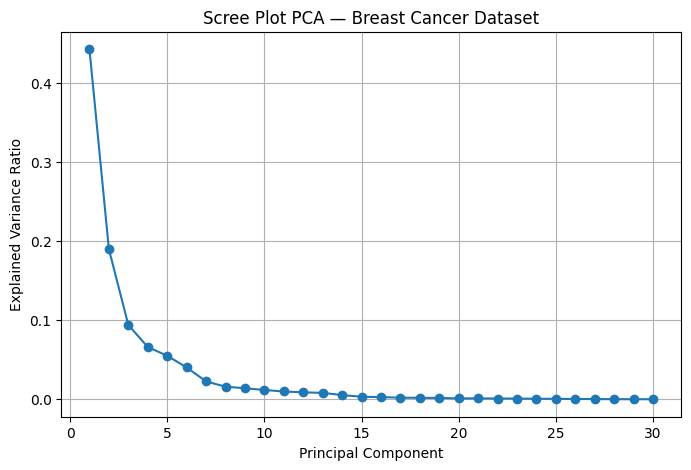

In [ ]:
# PCA tanpa limit komponen (biar bisa lihat varian tiap PC)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Melihat explained variance ratio per komponen
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio per PC:\n", explained_var)
print("\nTotal Variance:", explained_var.sum())

# Plot Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot PCA — Breast Cancer Dataset")
plt.grid(True)
plt.show()

Shape X_pca_2: (569, 2)


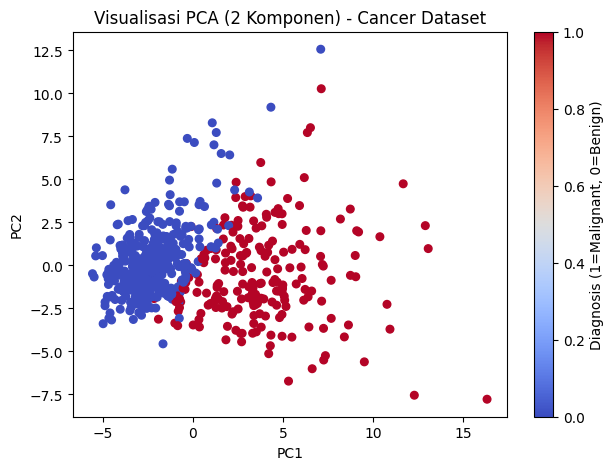

In [ ]:
# PCA dengan 2 komponen utama untuk visual
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print("Shape X_pca_2:", X_pca_2.shape)

# Plot PCA 2D
plt.figure(figsize=(7,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap='coolwarm', s=30)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA (2 Komponen) - Cancer Dataset")
plt.colorbar(label="Diagnosis (1=Malignant, 0=Benign)")
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Model SVM tanpa PCA =====
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train, y_train)
y_pred_no_pca = svm_no_pca.predict(X_test)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)


# ===== PCA dengan 8 komponen =====
pca_8 = PCA(n_components=8)
X_train_pca = pca_8.fit_transform(X_train)
X_test_pca = pca_8.transform(X_test)

# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (8 komponen):", acc_pca)

Akurasi SVM tanpa PCA: 0.9736842105263158
Akurasi SVM dengan PCA (8 komponen): 0.956140350877193


In [ ]:
# Ringkasan perbandingan model
comparison = pd.DataFrame({
    "Model": ["SVM Tanpa PCA", "SVM + PCA (8 Komponen)"],
    "Jumlah Fitur": [30, 8],
    "Akurasi": [acc_no_pca, acc_pca]
})
comparison

,Model,Jumlah Fitur,Akurasi
0,SVM Tanpa PCA,30,0.973684
1,SVM + PCA (8 Komponen),8,0.956140


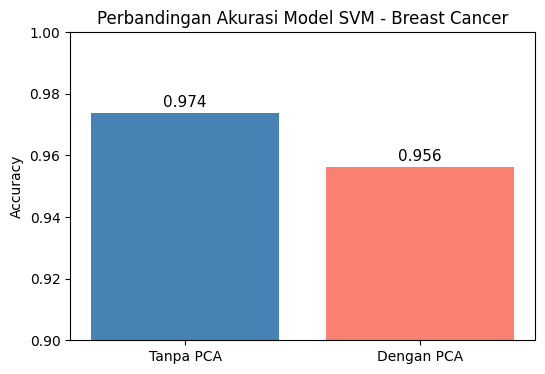

In [ ]:
# Plot perbandingan akurasi
plt.figure(figsize=(6,4))
plt.bar(["Tanpa PCA", "Dengan PCA"], [acc_no_pca, acc_pca], color=["steelblue","salmon"])
plt.ylim(0.90, 1.00)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model SVM - Breast Cancer")
for i,v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v+0.002, f"{v:.3f}", ha="center", fontsize=11)
plt.show()


=== Classification Report - TANPA PCA ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



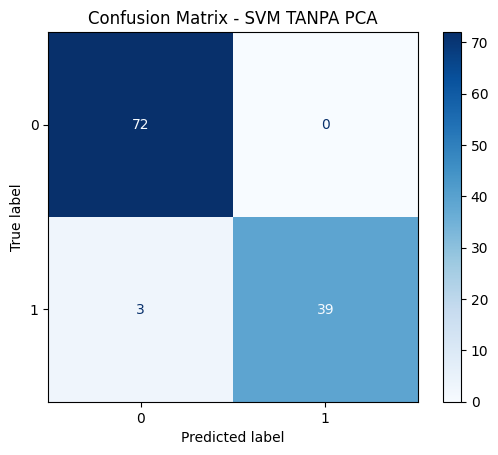

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

print("\n=== Classification Report - TANPA PCA ===")
print(classification_report(y_test, y_pred_no_pca))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_no_pca, cmap="Blues")
plt.title("Confusion Matrix - SVM TANPA PCA")
plt.show()


=== Classification Report - DENGAN PCA (8 komponen) ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



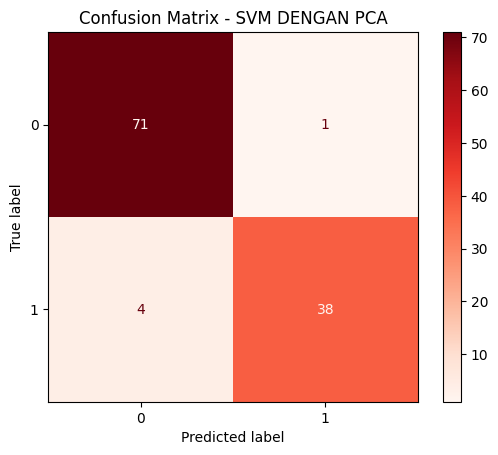

In [ ]:
print("\n=== Classification Report - DENGAN PCA (8 komponen) ===")
print(classification_report(y_test, y_pred_pca))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca, cmap="Reds")
plt.title("Confusion Matrix - SVM DENGAN PCA")
plt.show()

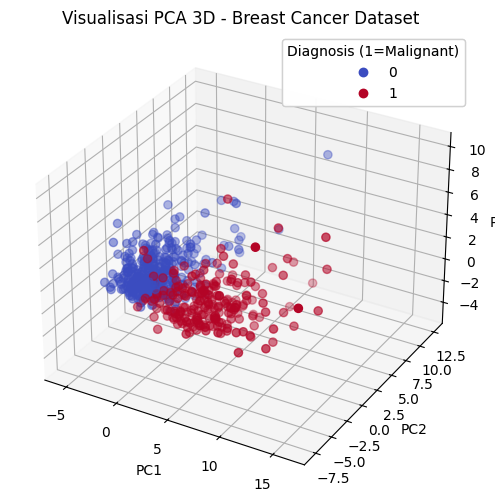

In [ ]:
# PCA 3 komponen
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2],
    c=y, cmap="coolwarm", s=35
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Visualisasi PCA 3D - Breast Cancer Dataset")

legend = ax.legend(*scatter.legend_elements(), title="Diagnosis (1=Malignant)")
ax.add_artist(legend)

plt.show()

    n_components  accuracy
0              2  0.929825
1              3  0.956140
2              4  0.947368
3              5  0.964912
4              6  0.964912
5              7  0.964912
6              8  0.956140
7              9  0.956140
8             10  0.964912
9             11  0.973684
10            12  0.973684
11            13  0.964912
12            14  0.956140
13            15  0.973684


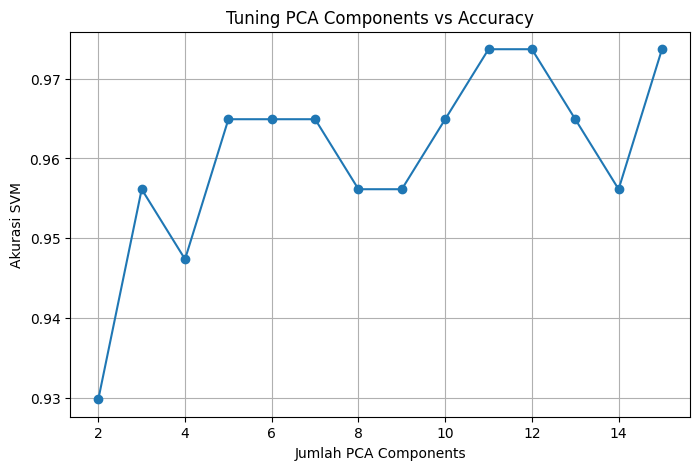

In [ ]:
acc_scores = []

for k in range(2, 16):  # tes PCA 2–15 komponen
    pca_tune = PCA(n_components=k)
    X_train_k = pca_tune.fit_transform(X_train)
    X_test_k = pca_tune.transform(X_test)

    model = SVC(kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train_k, y_train)
    pred = model.predict(X_test_k)

    acc_scores.append((k, accuracy_score(y_test, pred)))

# Convert to DataFrame
df_acc = pd.DataFrame(acc_scores, columns=["n_components", "accuracy"])
print(df_acc)

# Plot tuning result
plt.figure(figsize=(8,5))
plt.plot(df_acc["n_components"], df_acc["accuracy"], marker="o")
plt.xlabel("Jumlah PCA Components")
plt.ylabel("Akurasi SVM")
plt.title("Tuning PCA Components vs Accuracy")
plt.grid(True)
plt.show()